# MINOR PROJECT

## TASK 1 - Exploratory Data Analysis

In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')#to ignore warnings 

In [113]:
data = pd.read_csv("C:\\Users\\deepa\\Documents\\Jhanavi CS\\Internship - Python and ML\\Mini project\\heart.csv")

###### Q-1:Are there any missing values in the dataset? If so, how will you handle them? What is the distribution of heart disease and normal cases in the dataset? Is the dataset balanced or imbalanced?

###### Code - 


In [114]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [115]:
#to check null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Here we conclude that there are no null values in the dataset .

In case of null values we use the following command

data = data.dropna()

This is done to drop or remove null values

In [116]:
#What is the distribution of heart disease and normal cases in the dataset?
data.groupby(['HeartDisease'])['HeartDisease'].count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

There are total 508 people having heart diseases and 410 normal cases

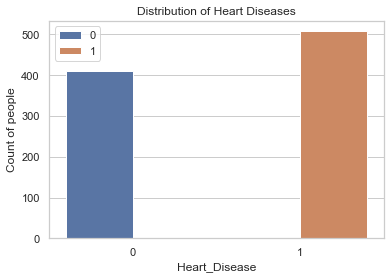

In [117]:
#Is the dataset balanced or imbalanced?
ax = sns.countplot(x = data['HeartDisease'],hue = data['HeartDisease'])
ax.set_title('Distribution of Heart Diseases')
sns.set_theme(style="whitegrid")
ax.set_xlabel('Heart_Disease')
ax.set_ylabel('Count of people')
plt.legend()
plt.show()

###### Q-2:How does the occurrence of heart disease vary with different input features (age, gender, hypertension, diabetes, etc.)? Create visualizations such as bar plots or boxplots to compare their distributions

###### Code - 

Text(0.5, 1.0, 'Heart Diseases vs Age')

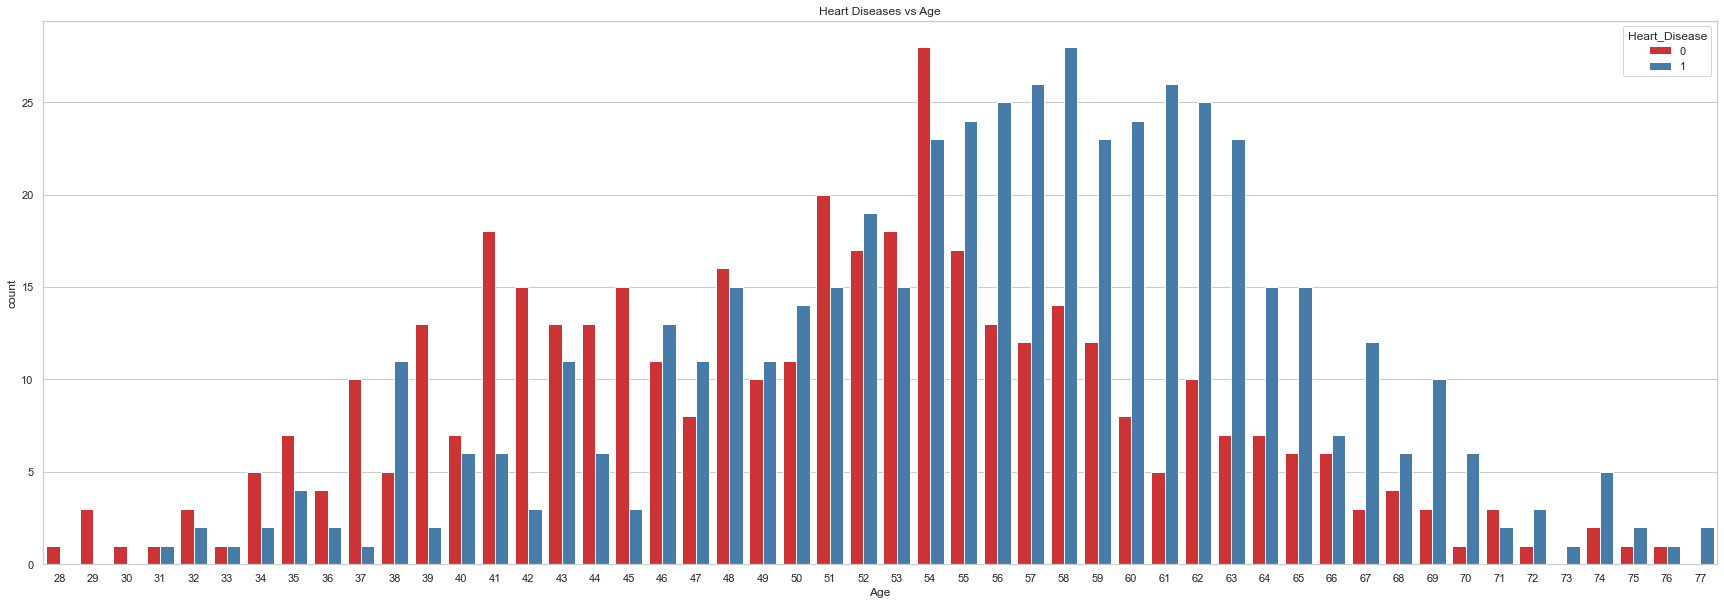

In [118]:
#Occurance of heart diseases with age

df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"Age":data['Age']})
plt.figure(figsize=(30, 10))
ax = sns.countplot(x=df["Age"], hue=df["Heart_Disease"],palette = 'Set1')
sns.set_theme(style="whitegrid")
ax.set_title('Heart Diseases vs Age')

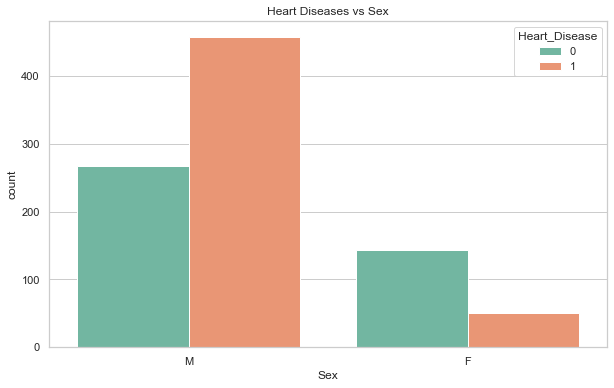

In [119]:
#Occurance of heart diseases with gender

df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"Sex":data['Sex']})
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["Sex"], hue=df["Heart_Disease"],palette = 'Set2')
ax.set_title('Heart Diseases vs Sex')
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Heart Diseases vs BP')

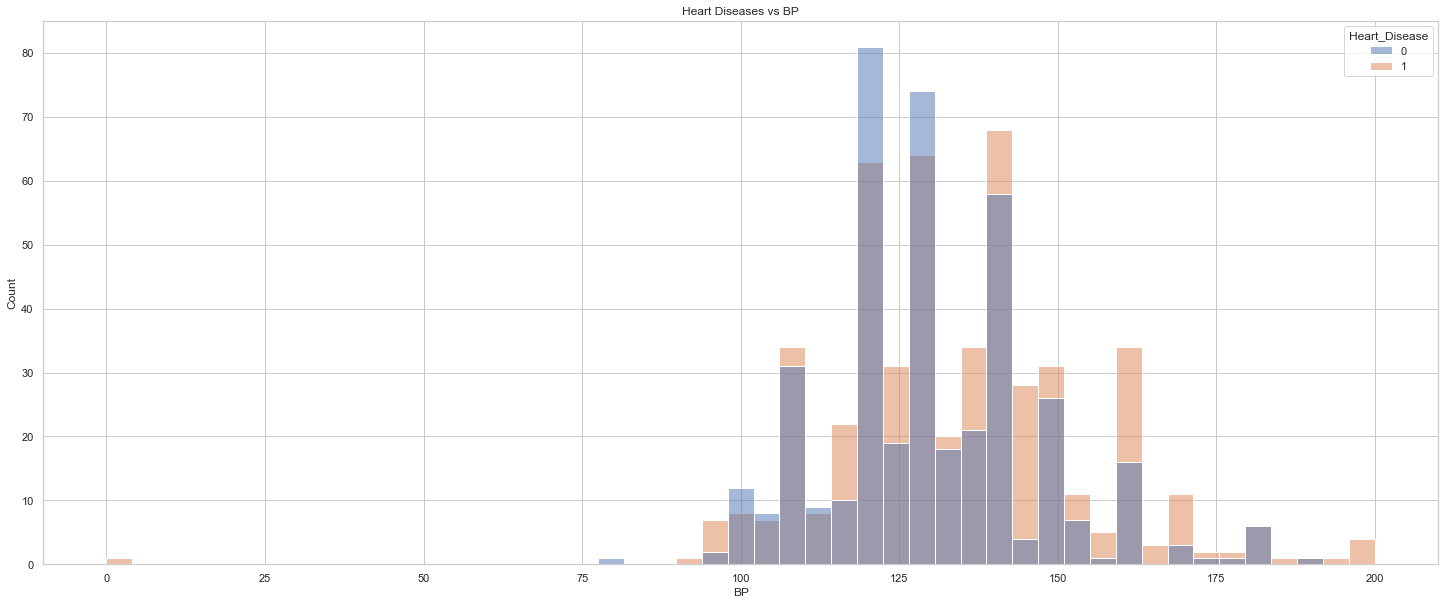

In [120]:
#Occurance of heart diseases with hypertension

df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"BP":data['RestingBP']})
plt.figure(figsize=(25, 10))
ax = sns.histplot(x=df["BP"], hue=df["Heart_Disease"])
ax.set_title('Heart Diseases vs BP')

Text(0.5, 1.0, 'Heart Diseases vs Diabetes')

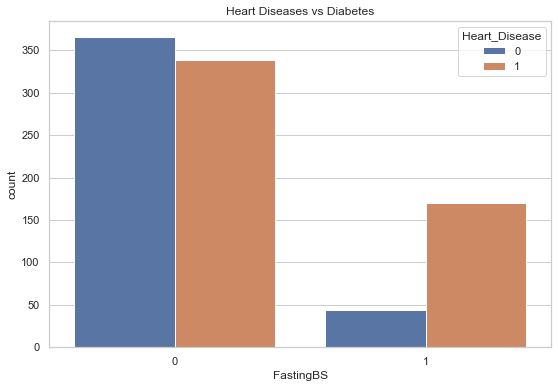

In [121]:
#Occurance of heart diseases with diabetes

df = pd.DataFrame({"Heart_Disease":data['HeartDisease'],"FastingBS":data['FastingBS']})
plt.figure(figsize=(9,6))
ax = sns.countplot(x=df["FastingBS"], hue=df["Heart_Disease"])
ax.set_title('Heart Diseases vs Diabetes')

People with fasting blood sugar value 1 and having heart diseases are diagnosed with diabetes

###### Q-3:Can you identify any outliers in the dataset, particularly for numerical features like age, resting blood pressure, cholesterol levels, maximum heart rate achieved, and oldpeak? How are you planning to handle them?

###### Code - 

For age column in dataset - 

<AxesSubplot:>

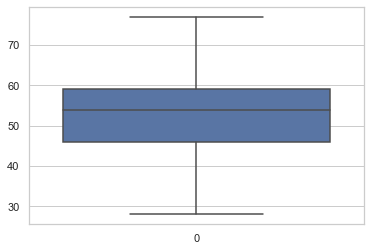

In [139]:
#identifying the outliers
sns.boxplot(data['Age'])

In [140]:
# Calculate the upper and lower limits
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [141]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Age']>=upper)[0]
lower_array = np.where(data['Age']<=lower)[0]

In [142]:
# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

For cholesterol column in dataset -

<AxesSubplot:>

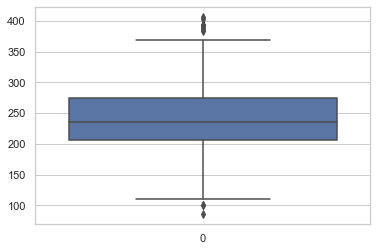

In [143]:
sns.boxplot(data['Cholesterol'])

In [144]:
# Calculate the upper and lower limits
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [145]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Cholesterol']>=upper)[0]
lower_array = np.where(data['Cholesterol']<=lower)[0]

In [148]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

For maximum heart rate column in dataset - 

<AxesSubplot:>

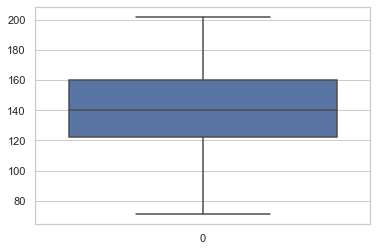

In [149]:
sns.boxplot(data['MaxHR'])

In [150]:
# Calculate the upper and lower limits
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [151]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['MaxHR']>=upper)[0]
lower_array = np.where(data['MaxHR']<=lower)[0]

In [152]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

For resting blood pressure column - 

<AxesSubplot:>

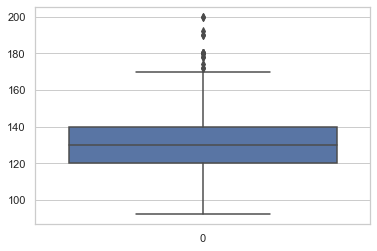

In [153]:
sns.boxplot(data['RestingBP'])

In [154]:
# Calculate the upper and lower limits
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [155]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['RestingBP']>=upper)[0]
lower_array = np.where(data['RestingBP']<=lower)[0]

In [156]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

For Old peak column - 

<AxesSubplot:>

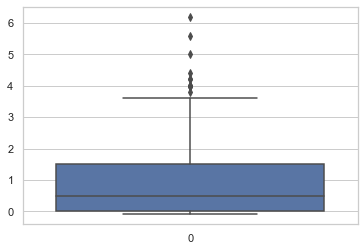

In [158]:
sns.boxplot(data['Oldpeak'])

In [159]:
# Calculate the upper and lower limits
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
#IQR - inter quartile range
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [160]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Oldpeak']>=upper)[0]
lower_array = np.where(data['Oldpeak']<=lower)[0]

In [161]:
# Removing the outliers
common_indices = np.intersect1d(upper_array, lower_array)
data.drop(index=common_indices, inplace=True)

###### Observation - 

The accuracy of the model before removing outliers was 81.04% , while that after removing the outliers was 83.67% as found in task - 2 .

###### Q-4: Are there any correlations between the different features and the presence of heart disease? Visualize it using a heatmap or correlation matrix. Determine if any feature(s) can be dropped based on their relationship with the target variable.

###### Code - 

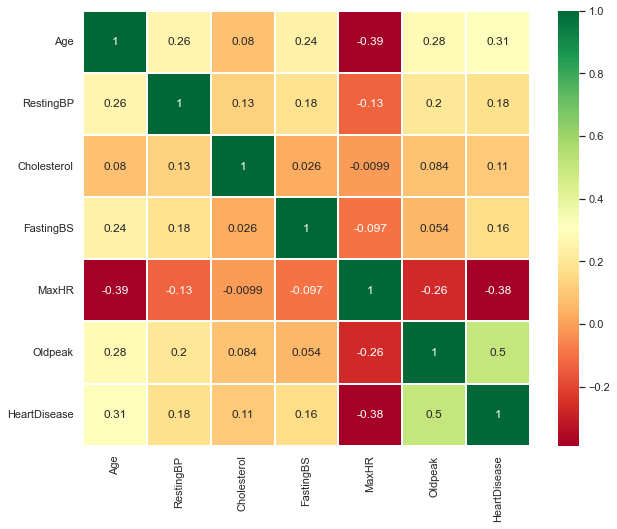

In [162]:
#correlation matrix between different features
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

###### Explanation - 

When two features are highly or perfectly correlated i.e the increase in one leads to increase in other(direct relation),then
this implies similar information and little or no variance in information. This can lead to redundant information and reduces training time.

Here the highest correlation is between Oldpeak and HeartDisease ie 0.5 which is suitable to be inputted in our model , hence all features can be carried out as such and do not need to be dropped.


###### Q-5: Can you perform feature encoding or transformation on categorical variables like sex, chest pain type, resting ECG, and exercise-induced angina? Which encoding technique would be most suitable?

###### Code - 

In [163]:
data['Sex'].replace(['M','F'],[0,1],inplace=True)
data['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
#[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
data['RestingECG'].replace(['ST','Normal','LVH'],[0,1,2],inplace=True)
data['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
data['ST_Slope'].replace(['Flat','Up','Down'],[0,1,2],inplace=True)

###### Explanation - 

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
For example, gender is a categorical variable having two categories (male and female).

Since we cannot pass strings to a machine learning model, we need to convert features like Sex ,Chest pain type ,Resting ECG ,Exercise Induced Angina and ST_Slope into numeric values by feature transformation.

## TASK 2 - Classification/Regression

#### Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)

Feature Engineering

Split dataset in train-test (80:20 ratio)

Model selection

Model training

Model evaluation

Fine-tune the Model

Make predictions

Summarize your model's performance by evaluation metrices


###### Code - 

We have performed feature engineering above converting categorical data having string values to numberical data.

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
train , test = train_test_split(data , test_size=0.2,random_state = 1234)
#test_size 0.2 ensures an 80-20 split

In [166]:
X_train=train.drop(['HeartDisease'],1)
X_test=test.drop(['HeartDisease'],1)

Y_train=train['HeartDisease']
Y_test=test['HeartDisease']

In [167]:
X_train.shape, Y_train.shape

((588, 11), (588,))

In [168]:
X_test.shape , Y_test.shape

((147, 11), (147,))

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
#Creating a model
model = LogisticRegression()

In [171]:
#Training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [172]:
#Model accuracy
model.score(X_train, Y_train)

0.8656462585034014

We can see that the training accuracy is 86.56% 

In [173]:
#Model evaluation
model.score(X_test,Y_test)

0.8367346938775511

We see that the test accuracy of the model is 83.67% 

In [174]:
#Making predictions
pred = model.predict(X_test)
pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [175]:
#Summarize your model's performance by evaluation metrices
from sklearn import metrics 

In [176]:
print('Accuracy of model is: ',metrics.accuracy_score(pred,Y_test))

Accuracy of model is:  0.8367346938775511


###### The final result gives us that the accuracy of our model is 83.67% .